# TP1 Calcul approché d'integrales - Methodes des rectangles.

In [1]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import time 
np.set_printoptions(precision =5 )

## Repartition uniforme de points sur un intervalle

La fonction linspace(a,b,n) de la librairie numpy construit n points uniformement repartis sur [a,b]. Elle renvoie un tableau de n elements:

## Exercice 1

In [2]:
def trace_rect(f, a,b,N):
    n = 1000
    X = np.linspace(a,b, n)
    Vf = f(X)
    
    U = np.linspace(a,b,N)
    V_rect1 = np.zeros(n)
    for i in range(n):
        for j in range(N-1):
            if (U[j] <= X[i]) & (U[j+1] > X[i]):
                V_rect1[i] = f(U[j])
    
    V_rect2 = np.zeros(n)
    for i in range(n):
        for j in range(N-1):
            if (U[j] <= X[i]) & (U[j+1] > X[i]):
                V_rect2[i] = f(U[j+1])

    V_rect3 = np.zeros(n)
    for i in range(n):
        for j in range(N-1):
            if (U[j] <= X[i]) & (U[j+1] > X[i]):
                V_rect3[i] = f((U[j]+U[j+1])/2)
                    
    plt.plot(X, Vf)
    plt.plot(X, V_rect1)
    plt.plot(X, V_rect2)
    plt.plot(X, V_rect3)
    plt.legend(['f', 'RG', 'RD', 'PM'], loc = 'center')
    plt.title('Methode des rectangles')

    return 0

0

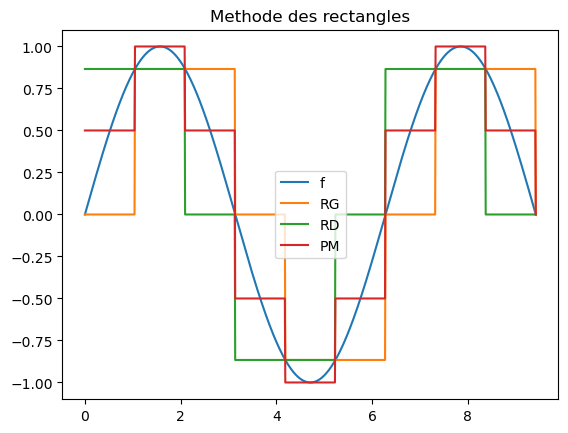

In [3]:
f = lambda x: -x**2
trace_rect(np.sin, 0,3*np.pi,10)

### Exercice 2

In [4]:
def RG(f, a, b, N):
    s = 0
    subd = np.linspace(a,b,N+1)
    for i in range(N):
        s = s + f(subd[i])
    s = s * ((b-a)/N)
    return s

def RD(f, a, b, N):
    s = 0
    subd = np.linspace(a,b,N+1)
    for i in range(1,N+1):
        s = s + f(subd[i])
    s = s * ((b-a)/N)
    return s

def PM(f, a, b, N):
    s = 0
    subd = np.linspace(a,b,N+1)
    for i in range(0,N):
        s = s + f((subd[i]+subd[i+1])/2)
    s = s * (b-a)/N
    return s

def Int_trap(f, a,b,N):
    s = 0
    subd = np.linspace(a,b,N+1)
    for i in range(N):
        s += ( f(subd[i]) + f(subd[i+1]) )/2
    s = s*(b-a)/N
    return s

def Simpson(f, a,b,N):
    s=0
    x = np.linspace(a,b,N+1)
    for i in range(N):
        s += (f(x[i]) + 4*f((x[i]+x[i+1])/2) + f(x[i+1]))
    s = s*(b-a)/(6*N)
    return s

In [5]:
def erreur(f, a,b,s,N):
    return np.array([abs(RG(f,a,b,N) - s), abs(RD(f,a,b,N) - s), abs(PM(f,a,b,N) - s), abs(Int_trap(f,a,b,N) - s), abs(Simpson(f,a,b,N)-s)])

In [6]:
f1 = lambda x: x**2
f2 = lambda x: 1/(x+1)**2
f3 = lambda x: (x+1)**0.5

In [7]:
PM(f1,1,2,10)

2.3325

In [8]:
erreur(f1,1,2,7/3,10)

array([1.48333e-01, 1.51667e-01, 8.33333e-04, 1.66667e-03, 4.44089e-16])

In [9]:
# df = pd.DataFrame()
# df = pd.concat([df,pd.DataFrame(erreur(f1,1,2, 7/3,10))], axis=1)
# df = pd.concat([df,pd.DataFrame(erreur(f1,1,2, 7/3,100))], axis=1)
# df = pd.concat([df,pd.DataFrame(erreur(f1,1,2, 7/3,1000))], axis=1)
# df.columns = ['N=10', 'N=100', 'N=1000', 'N=10000', 'N=100000']
# df.index = ['RG', 'RG', 'PM', 'Trap', 'Simp']

In [10]:
df1 = pd.DataFrame(erreur(f1,1,2, 7/3,10))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df2 = pd.DataFrame(erreur(f1,1,2, 7/3,100))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df3 = pd.DataFrame(erreur(f1,1,2, 7/3,1000))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df4 = pd.DataFrame(erreur(f1,1,2, 7/3,10000))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df5 = pd.DataFrame(erreur(f1,1,2, 7/3,100000))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df = pd.DataFrame()
df = pd.concat([df1,df2,df3,df4, df5], axis=1)
df.columns = ['N=10', 'N=100', 'N=1000', 'N=10000', 'N=100000']
df.index = ['RG', 'RG', 'PM', 'Trap', 'Simp']

In [11]:
df

,N=10,N=100,N=1000,N=10000,N=100000
RG,1.483333e-01,1.498333e-02,1.499833e-03,1.499983e-04,1.499998e-05
RG,1.516667e-01,1.501667e-02,1.500167e-03,1.500017e-04,1.500002e-05
PM,8.333333e-04,8.333333e-06,8.333333e-08,8.333405e-10,8.332890e-12
Trap,1.666667e-03,1.666667e-05,1.666667e-07,1.666668e-09,1.667200e-11
Simp,4.440892e-16,4.440892e-16,8.881784e-16,3.996803e-15,1.154632e-14


In [19]:
def temps(f,a,b,s,N):
    print(f'Temps de calcul pour {N} iterations\n')
    tic = time.time()
    RG(f,a,b,N)
    toc_rg = time.time() - tic
    print('- RG: ', format(toc_rg,'.2E'), 'secondes\n')
    
    tic = time.time()
    RD(f,a,b,N)
    toc_rd = time.time()
    # print(f'- RD: , {toc-tic} secondes\n')
    print('- RD: ', format(toc_rd,'.2E'), 'secondes\n')

    tic = time.time()
    PM(f,a,b,N)
    toc_pm = time.time() - tic
    # print(f'- PM: , {toc-tic} secondes\n')
    print('- PM: ', format(toc_pm,'.2E'), 'secondes\n')


    tic = time.time()
    Int_trap(f,a,b,N)
    toc_tr = time.time() -tic
    # print(f'- Int_trap: , {toc-tic} secondes\n')
    print('- Trapeze: ', format(toc_tr,'.2E'), 'secondes\n')


    tic = time.time()
    Simpson(f,a,b,N)
    toc_sm = time.time() - tic
    # print(f'- Simpson: , {toc-tic} secondes\n')
    print('- Simpson: ', format(toc_sm,'.2E'), 'secondes\n')

    return np.array([toc_rg, toc_rd, toc_pm, toc_tr, toc_sm])


In [20]:
temps(f3,3,8,38/3,100)

Temps de calcul pour 100 iterations

- RG:  3.69E-04 secondes

- RD:  1.72E+09 secondes

- PM:  1.08E-04 secondes

- Trapeze:  1.30E-04 secondes

- Simpson:  2.44E-04 secondes



array([3.69310e-04, 1.71768e+09, 1.08004e-04, 1.29938e-04, 2.43902e-04])

In [24]:
df1 = pd.DataFrame(temps(f1,1,2, 7/3,10))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df2 = pd.DataFrame(temps(f1,1,2, 7/3,100))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df3 = pd.DataFrame(temps(f1,1,2, 7/3,1000))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df4 = pd.DataFrame(temps(f1,1,2, 7/3,10000))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df5 = pd.DataFrame(temps(f1,1,2, 7/3,100000))#, columns=['N=10', 'N=100', 'N=1000', 'N=10000'])
df_temps = pd.DataFrame()
df_temps = pd.concat([df1,df2,df3,df4, df5], axis=1)
df_temps.columns = ['N=10', 'N=100', 'N=1000', 'N=10000', 'N=100000']
df_temps.index = ['RG', 'RG', 'PM', 'Trap', 'Simp']
df_temps

Temps de calcul pour 10 iterations

- RG:  1.70E-04 secondes

- RD:  1.72E+09 secondes

- PM:  1.24E-04 secondes

- Trapeze:  5.39E-05 secondes

- Simpson:  5.20E-05 secondes

Temps de calcul pour 100 iterations

- RG:  1.10E-04 secondes

- RD:  1.72E+09 secondes

- PM:  9.80E-05 secondes

- Trapeze:  1.14E-04 secondes

- Simpson:  1.75E-04 secondes

Temps de calcul pour 1000 iterations

- RG:  4.49E-04 secondes

- RD:  1.72E+09 secondes

- PM:  7.77E-04 secondes

- Trapeze:  8.53E-04 secondes

- Simpson:  1.46E-03 secondes

Temps de calcul pour 10000 iterations

- RG:  2.90E-02 secondes

- RD:  1.72E+09 secondes

- PM:  8.72E-03 secondes

- Trapeze:  1.03E-02 secondes

- Simpson:  1.73E-02 secondes

Temps de calcul pour 100000 iterations

- RG:  3.72E-02 secondes

- RD:  1.72E+09 secondes

- PM:  6.22E-02 secondes

- Trapeze:  1.02E-01 secondes

- Simpson:  1.50E-01 secondes



,N=10,N=100,N=1000,N=10000,N=100000
RG,1.702309e-04,1.096725e-04,4.489422e-04,2.896690e-02,3.719306e-02
RG,1.717682e+09,1.717682e+09,1.717682e+09,1.717682e+09,1.717682e+09
PM,1.239777e-04,9.799004e-05,7.770061e-04,8.719921e-03,6.222391e-02
Trap,5.388260e-05,1.139641e-04,8.528233e-04,1.030087e-02,1.017888e-01
Simp,5.197525e-05,1.749992e-04,1.458883e-03,1.726103e-02,1.502500e-01


### Exercice 3

In [14]:
# def vect_erreur(f,a,b, s, Nmax):

#     df = pd.DataFrame()
#     for i in range(Nmax):
#         l = pd.DataFrame(erreur(f1,a,b, s,i+1))
#         df = pd.concat([df,l], axis=1)
#     plt.figure()
#     for i in range(Nmax):
#         plt.plot(np.log(range(1,Nmax+1), np.log(np.array(df.loc[i]))))
#     plt.show()

#     return df

In [15]:
def Erreur(f,a,b,s,Nmax):
    E=np.zeros((Nmax,5))
    for N in range(Nmax):
        E[N,0]=abs(RD(f,a,b,N+1)-s)
        E[N,1]=abs(RG(f,a,b,N+1)-s)
        E[N,2]=abs(PM(f,a,b,N+1)-s)
        E[N,3]=abs(Int_trap(f,a,b,N+1)-s)
        E[N,4]=abs(Simpson(f,a,b,N+1)-s)

    return E

def vec_Erreur(f,a,b,s ,Nmax):

    X = np.zeros(Nmax)
    for n in range(Nmax):
        X[n]=n+1
    Vect_e =Erreur(f,a,b,s ,Nmax)
    plt.plot(np.log(X),np.log(Vect_e[:,0]), label='RG')
    plt.plot(np.log(X),np.log(Vect_e[:,1]), label='RD')
    plt.plot(np.log(X),np.log(Vect_e[:,2]), label='PM')
    plt.plot(np.log(X),np.log(Vect_e[:,3]), label='Trap')
    plt.plot(np.log(X),np.log(Vect_e[:,4]), label='Simp')

    # plt.xlabel("ln(n) (Nmax=%i)" %Nmax)
    # plt.ylabel("ln(e_n)")
    plt.grid()
    # plt.title("Evolution de l'erreur e_n en fonction de n\n")
    plt.legend()
    return[]

/var/folders/hs/kq4b3ddn1sb7l4lnsw24h3tw0000gn/T/ipykernel_56798/315225873.py:22: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(X),np.log(Vect_e[:,4]), label='Simp')


[]

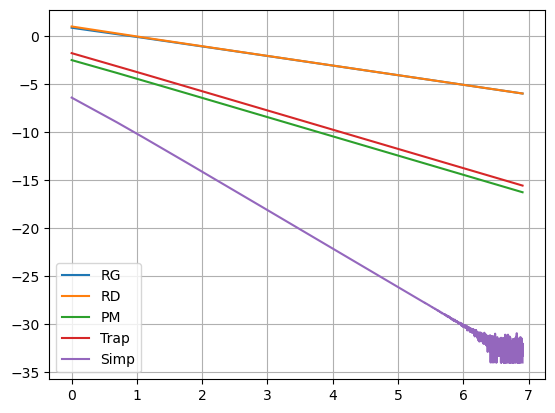

In [16]:
# vec_Erreur(f1,1,2,7/3,1000)
# vec_Erreur(f2,0,1,1/2,100)
vec_Erreur(f3,3,8,38/3,1000)